![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [63]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [64]:
#preprocessing the dataset(handling missing values, dropping non-numeric columns)
penguins_df = penguins_df.dropna()
penguins_df = penguins_df.drop(columns=['sex'])
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


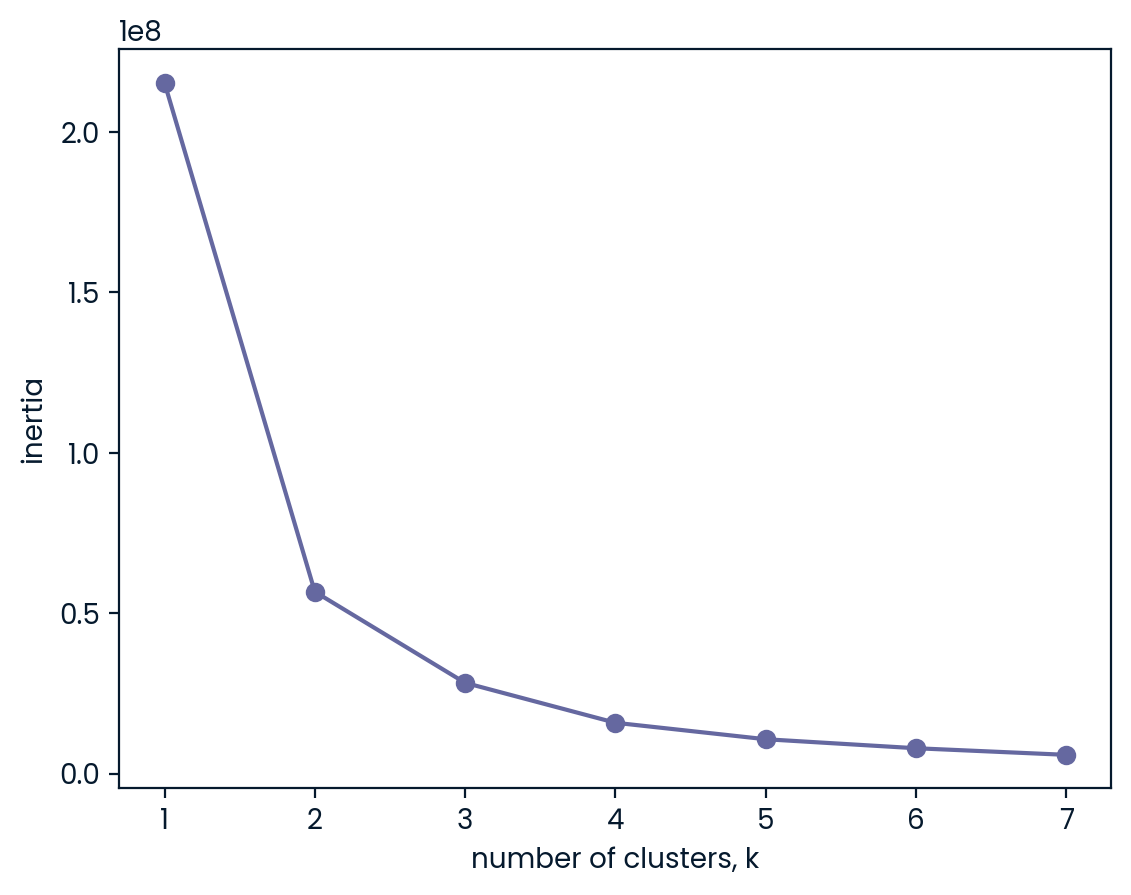

In [65]:
#choosing the best number of clusters
ks = range(1, 8)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(penguins_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#following the elbow method, 3 seems to be the best number of clusters.

In [66]:
# Scaling the data
scaler = StandardScaler()
stat_penguins_array = scaler.fit_transform(penguins_df)

# Performing clustering
model = KMeans(n_clusters=3)
labels = model.fit_predict(stat_penguins_array)

# Add the cluster labels to the original numeric dataframe
penguins_df['cluster_label'] = labels

# Calculate mean of original variables by cluster
stat_penguins = penguins_df.groupby('cluster_label').mean().reset_index()
print(stat_penguins)

   cluster_label  culmen_length_mm  ...  flipper_length_mm  body_mass_g
0              0         47.568067  ...         217.235294  5092.436975
1              1         47.662353  ...         196.917647  3898.235294
2              2         38.305469  ...         188.554688  3587.500000

[3 rows x 5 columns]
